# VISp and VISpm


## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Yudi Hu**: 
- **Lauren Hui**: 
- **Sunnie Hong**: 

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

*Fill in your research question here*

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

Importing packages needed for the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
import xarray as xr

Importing Cell Types Dataset from Allen Brain Institute

In [2]:
cell_type_df = pd.read_csv('cell_types_specimen_details.csv')
cell_type_df

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,NaN,525011903,H16.03.003.01.14.02,right,12113,"""frontal lobe""",FroL,12113,FroL,3,...,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142,25 yrs,Male,epilepsy,White or Caucasian,9.0,Homo Sapiens,524848408,H16.03.003
1,Oxtr-T2A-Cre,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,left,778,"""Primary visual area, layer 5""",VISp5,385,VISp,5,...,/api/v2/well_known_file_download/566738214,/api/v2/well_known_file_download/566738219,NaN,NaN,NaN,NaN,NaN,Mus musculus,563340157,Oxtr-T2A-Cre;Ai14-293837
2,Pvalb-IRES-Cre,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487618917,/api/v2/well_known_file_download/491380580,NaN,NaN,NaN,NaN,NaN,Mus musculus,319194354,Pvalb-IRES-Cre;Ai14(IVSCC)-170927
3,NaN,528642047,H16.06.009.01.02.06.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,5,...,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
4,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,right,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/657612184,/api/v2/well_known_file_download/657612186,NaN,NaN,NaN,NaN,NaN,Mus musculus,605622695,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Ctgf-T2A-dgCre,512322162,Ctgf-2A-dgCre;Ai14(IVSCC)-240529.03.02.01,right,305,"""Primary visual area, layer 6b""",VISp6b,385,VISp,6b,...,/api/v2/well_known_file_download/513878612,/api/v2/well_known_file_download/513878614,NaN,NaN,NaN,NaN,NaN,Mus musculus,511856495,Ctgf-2A-dgCre;Ai14(IVSCC)-240529
2327,Rorb-IRES2-Cre,488473535,Rorb-IRES2-Cre-D;Ai14-212867.03.01.01,left,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/488474970,/api/v2/well_known_file_download/491376689,NaN,NaN,NaN,NaN,NaN,Mus musculus,487607572,Rorb-IRES2-Cre-D;Ai14-212867
2328,Rorb-IRES2-Cre,467003163,Rorb-IRES2-Cre-D;Ai14-172652.02.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487623212,/api/v2/well_known_file_download/491378303,NaN,NaN,NaN,NaN,NaN,Mus musculus,322489498,Rorb-IRES2-Cre-D;Ai14(IVSCC)-172652
2329,Pvalb-IRES-Cre,572609946,Pvalb-IRES-Cre;Ai14-301945.04.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/575795570,/api/v2/well_known_file_download/575795572,NaN,NaN,NaN,NaN,NaN,Mus musculus,570930952,Pvalb-IRES-Cre;Ai14-301945


Importing the Neuropixels Cache. 

In [3]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

## Data Wrangling

From the Cell Types database: creating a separate dataframe for VISp and VISpm data

In [4]:
cell_type_VISp = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISp')].reset_index(drop=True).fillna(0)
cell_type_VISpm = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISpm')].reset_index(drop=True).fillna(0)
cell_type_VISp.head()
cell_type_VISpm.head()

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,585805211,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-315067.0...,left,41,"""posteromedial visual area, layer 2/3""",VISpm2/3,533,VISpm,2/3,...,/api/v2/well_known_file_download/606111374,/api/v2/well_known_file_download/606111379,0,0,0,0,0.0,Mus musculus,584627997,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-315067
1,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,586073850,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-315072.0...,left,41,"""posteromedial visual area, layer 2/3""",VISpm2/3,533,VISpm,2/3,...,/api/v2/well_known_file_download/606111617,/api/v2/well_known_file_download/606111619,0,0,0,0,0.0,Mus musculus,584628021,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-315072
2,Ndnf-IRES2-dgCre,565120091,Ndnf-IRES2-dgCre;Ai14-292670.04.02.01,right,501,"""posteromedial visual area, layer 4""",VISpm4,533,VISpm,4,...,/api/v2/well_known_file_download/566724383,/api/v2/well_known_file_download/566724388,0,0,0,0,0.0,Mus musculus,563340185,Ndnf-IRES2-dgCre;Ai14-292670
3,Vipr2-IRES2-Cre,590558808,Vipr2-IRES2-Cre;Ai14-316908.04.02.01,right,469,"""posteromedial visual area, layer 6b""",VISpm6b,533,VISpm,6b,...,/api/v2/well_known_file_download/606112029,/api/v2/well_known_file_download/606112031,0,0,0,0,0.0,Mus musculus,586420039,Vipr2-IRES2-Cre;Ai14-316908
4,Scnn1a-Tg3-Cre,466827702,Scnn1a-Tg3-Cre;Ai14-180211.05.01.01,left,565,"""posteromedial visual area, layer 5""",VISpm5,533,VISpm,5,...,/api/v2/well_known_file_download/487628699,/api/v2/well_known_file_download/491376465,0,0,0,0,0.0,Mus musculus,418778062,Scnn1a-Tg3-Cre;Ai14(IVSCC)-180211


From these datasets, making another dataframe specifically including average firing rate, peak to ramp, adaptation index, and time constant from VISp and VISpm data respectively.

In [5]:
visp_features = cell_type_VISp[['line_name','ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
vispm_features = cell_type_VISpm[['line_name','ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
visp_features.head()


,line_name,ef__avg_firing_rate,ef__peak_t_ramp,ef__tau,ef__adaptation,structure_parent__acronym
0,Oxtr-T2A-Cre,0.000000,14.737200,11.291090,0.000000,VISp
1,Pvalb-IRES-Cre,79.952029,11.763022,4.121689,0.000643,VISp
2,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,12.666099,8.423400,5.166574,-0.015098,VISp
3,Cux2-CreERT2,17.890688,2.851312,20.567767,0.032340,VISp
4,Scnn1a-Tg3-Cre,10.611937,3.421542,23.182755,0.026732,VISp


In [6]:
vispm_features.head()

,line_name,ef__avg_firing_rate,ef__peak_t_ramp,ef__tau,ef__adaptation,structure_parent__acronym
0,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,39.570967,9.657793,7.296395,0.012464,VISpm
1,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,41.345379,8.521987,6.825851,0.010213,VISpm
2,Ndnf-IRES2-dgCre,21.317416,3.257533,25.230889,0.033795,VISpm
3,Vipr2-IRES2-Cre,73.053430,11.424590,6.992904,0.001740,VISpm
4,Scnn1a-Tg3-Cre,16.740791,3.190572,19.412868,0.027348,VISpm


Generating a dataframe with VISp units firing rate and cell line name

In [7]:
cell_visp=visp_features[['ef__avg_firing_rate','line_name','structure_parent__acronym']]
cell_visp.columns=['firing_rate','feature','region']
cell_visp

,firing_rate,feature,region
0,0.000000,Oxtr-T2A-Cre,VISp
1,79.952029,Pvalb-IRES-Cre,VISp
2,12.666099,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,VISp
3,17.890688,Cux2-CreERT2,VISp
4,10.611937,Scnn1a-Tg3-Cre,VISp
...,...,...,...
1715,13.623050,Ctgf-T2A-dgCre,VISp
1716,47.867248,Rorb-IRES2-Cre,VISp
1717,16.498150,Rorb-IRES2-Cre,VISp
1718,81.532817,Pvalb-IRES-Cre,VISp


Generating a dataframe with VISpm units firing rate and cell line name

In [8]:
cell_vispm=vispm_features[['ef__avg_firing_rate','line_name','structure_parent__acronym']]
cell_vispm.columns=['firing_rate','feature','region']
cell_vispm

,firing_rate,feature,region
0,39.570967,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,VISpm
1,41.345379,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,VISpm
2,21.317416,Ndnf-IRES2-dgCre,VISpm
3,73.053430,Vipr2-IRES2-Cre,VISpm
4,16.740791,Scnn1a-Tg3-Cre,VISpm
...,...,...,...
84,65.288801,Pvalb-IRES-Cre,VISpm
85,100.401606,Vip-IRES-Cre,VISpm
86,31.084528,Vip-IRES-Cre,VISpm
87,15.202519,Rorb-IRES2-Cre,VISpm


Creating an EphysProjectCache object for the Neuropixels data and retrieving all sessions.

In [9]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


We are looking at experiments performed on a specific genotype Pvalb

In [10]:
pvalb_sessions = sessions[sessions.full_genotype.str.match('Pvalb')]

We select one of the above sessions to extract information about the optotagging stimuli that were delivered. We use session.optogenetic_stimulation_epochs to load a DataFrame that contains the information about the optotagging stimuli.

In [11]:
session = cache.get_session_data(pvalb_sessions.index.values[2])
session.optogenetic_stimulation_epochs

,start_time,stop_time,condition,level,name,duration
id,,,,,,
0,9224.96415,9224.97415,a single square pulse,2.5,pulse,0.010
1,9226.92424,9226.93424,a single square pulse,1.0,pulse,0.010
2,9229.04429,9230.04429,half-period of a cosine wave,2.5,raised_cosine,1.000
3,9231.02438,9232.02438,half-period of a cosine wave,1.0,raised_cosine,1.000
4,9233.01461,9233.02461,a single square pulse,2.5,pulse,0.010
...,...,...,...,...,...,...
175,9566.77201,9567.77201,2.5 ms pulses at 10 Hz,1.0,fast_pulses,1.000
176,9568.91215,9569.91215,2.5 ms pulses at 10 Hz,2.5,fast_pulses,1.000
177,9570.83222,9571.83222,half-period of a cosine wave,1.0,raised_cosine,1.000


Under the stimulus condition of 10ms pulses, we align spikes in VISp to the start of each light pulse so that we can the average firing rate for each unit in VISp as a function of time.

In [12]:
# trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
#                                                 (session.optogenetic_stimulation_epochs.duration < 0.02)]
# units1 = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]


# units1


In [13]:
# units = units1[units1['ecephys_structure_acronym']=='VISp']
# units

In [14]:
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]
units1 = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]

units = units1[units1['ecephys_structure_acronym']=='VISp']
units

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_visp = optotagging_spike_counts(bin_edges, trials, units)


Selecting units in VISp that increase their firing rate during the 10 ms pulse

In [15]:
baseline_visp = da_visp.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate_visp = baseline_visp.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked_visp = da_visp.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate_visp = evoked_visp.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Selecting a threshold: 2x increase in firing rate to find PV+ insterneurons in VISp

In [16]:
cre_pos_units_visp = da_visp.unit_id[(evoked_rate_visp / (baseline_rate_visp + 1)) > 2].values

cre_pos_units_visp

array([951851862, 951851916, 951851994, 951852233, 951852493, 951852577])

Adding a cell_type column to the VISp units dataset and assigning "PV+" or "PV-"to each VISp units

In [17]:
cre_pos_units_visp=list(cre_pos_units_visp)
df_visp_units=session.units[session.units.ecephys_structure_acronym.str.match('VISp')]
df_visp_units_index = df_visp_units.index.values.tolist()
df_visp_units['cell_type']=''
id = df_visp_units.index.values.tolist()


df_visp_units_rows = len(df_visp_units.axes[0])


for i in range(df_visp_units_rows):
    if id[i] in cre_pos_units_visp:
        df_visp_units.at[id [i],'cell_type']='PV+'
    else:
        df_visp_units.at[id [i],'cell_type']='PV-'

df_visp_units

,waveform_duration,firing_rate,waveform_PT_ratio,d_prime,waveform_recovery_slope,waveform_velocity_below,presence_ratio,L_ratio,waveform_amplitude,max_drift,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
951842332,0.315913,18.898412,0.790630,6.522781,-0.084343,0.392438,0.99,0.003595,98.587320,50.87,...,VISpm,7467,1300,7737,probeB,,29999.916411,1249.996517,True,PV-
951842382,0.865327,3.090630,0.439941,3.012829,-0.009557,-0.412060,0.99,0.003020,52.860990,42.34,...,VISpm,7475,1167,7750,probeB,,29999.916411,1249.996517,True,PV-
951842395,0.727973,1.357394,0.692553,3.901022,-0.017789,0.068677,0.99,0.012965,74.413755,43.20,...,VISpm,7476,1150,7751,probeB,,29999.916411,1249.996517,True,PV-
951842379,0.741709,1.236169,0.863803,3.400814,-0.022361,0.000000,0.98,0.000261,101.024235,46.01,...,VISpm,7476,1158,7751,probeB,,29999.916411,1249.996517,True,PV-
951843078,0.796650,2.880720,0.766510,3.490068,-0.025930,0.000000,0.99,0.004844,80.856945,28.32,...,VISpm,7477,1141,7751,probeB,,29999.916411,1249.996517,True,PV-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951852455,0.700503,0.805628,0.361237,5.193883,-0.176317,-0.686767,0.99,0.000170,381.306315,34.54,...,VISp,8439,827,8198,probeC,,29999.994202,1249.999758,True,PV-
951852509,0.645561,1.997127,0.386740,5.815448,-0.054624,-0.412060,0.98,0.001239,139.350705,27.50,...,VISp,8452,796,8207,probeC,,29999.994202,1249.999758,True,PV-
951852502,0.686767,1.538178,0.427633,4.423575,-0.085400,-0.206030,0.98,0.004913,140.351055,28.57,...,VISp,8452,796,8207,probeC,,29999.994202,1249.999758,True,PV-


Generating a dataframe with VISp neurons firing rate and excitability (PV+/PV-)

In [18]:
df_visp_firing_rate = df_visp_units[['firing_rate','cell_type']]
df_visp_firing_rate['region']='VISp'
df_visp_firing_rate.columns=['firing_rate','feature','region']
df_visp_firing_rate

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,firing_rate,feature,region
unit_id,,,
951842332,18.898412,PV-,VISp
951842382,3.090630,PV-,VISp
951842395,1.357394,PV-,VISp
951842379,1.236169,PV-,VISp
951843078,2.880720,PV-,VISp
...,...,...,...
951852455,0.805628,PV-,VISp
951852509,1.997127,PV-,VISp
951852502,1.538178,PV-,VISp


Under the stimulus condition of 10ms pulses, aligning spikes in VISpm to the start of each light pulse so that we can the average firing rate for each unit in VISpm as a function of time.

In [19]:
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_vispm = optotagging_spike_counts(bin_edges, trials, units)


Selecting units in VISpm that increase their firing rate during the 10ms pulse 

In [20]:
baseline_vispm = da_vispm.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate_vispm = baseline_vispm.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked_vispm = da_vispm.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate_vispm = evoked_vispm.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Selecting a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISpm

In [21]:
cre_pos_units_vispm = da_vispm.unit_id[(evoked_rate_vispm / (baseline_rate_vispm + 1)) > 2].values 
cre_pos_units_vispm

array([951842502, 951842512, 951842680, 951842745, 951842935])

Adding a cell_type column to the VISp units dataset and assigning "PV+" or "PV-"to each VISp units

In [22]:
df_vispm_units=session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]
df_vispm_units['cell_type']=''
cre_pos_units_vispm=list(cre_pos_units_vispm)
df_vispm_units_index = df_vispm_units.index.values.tolist()
id = df_vispm_units.index.values.tolist()


df_vispm_units_rows = len(df_vispm_units.axes[0])


for i in range(df_vispm_units_rows):
    if id[i] in cre_pos_units_vispm:
        df_vispm_units.at[id [i],'cell_type']='PV+'
    else:
        df_vispm_units.at[id [i],'cell_type']='PV-'

df_vispm_units

,waveform_duration,firing_rate,waveform_PT_ratio,d_prime,waveform_recovery_slope,waveform_velocity_below,presence_ratio,L_ratio,waveform_amplitude,max_drift,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
951842332,0.315913,18.898412,0.790630,6.522781,-0.084343,0.392438,0.99,3.595133e-03,98.587320,50.87,...,VISpm,7467,1300,7737,probeB,,29999.916411,1249.996517,True,PV-
951842382,0.865327,3.090630,0.439941,3.012829,-0.009557,-0.412060,0.99,3.020180e-03,52.860990,42.34,...,VISpm,7475,1167,7750,probeB,,29999.916411,1249.996517,True,PV-
951842395,0.727973,1.357394,0.692553,3.901022,-0.017789,0.068677,0.99,1.296452e-02,74.413755,43.20,...,VISpm,7476,1150,7751,probeB,,29999.916411,1249.996517,True,PV-
951842379,0.741709,1.236169,0.863803,3.400814,-0.022361,0.000000,0.98,2.614257e-04,101.024235,46.01,...,VISpm,7476,1158,7751,probeB,,29999.916411,1249.996517,True,PV-
951843078,0.796650,2.880720,0.766510,3.490068,-0.025930,0.000000,0.99,4.843848e-03,80.856945,28.32,...,VISpm,7477,1141,7751,probeB,,29999.916411,1249.996517,True,PV-
951842410,1.455946,2.594603,1.093136,4.281881,-0.061411,0.000000,0.99,1.247535e-02,81.807375,16.19,...,VISpm,7477,1141,7751,probeB,,29999.916411,1249.996517,True,PV-
951842406,0.535678,6.950617,0.929912,5.142080,-0.017474,-0.412060,0.99,3.354152e-03,98.016165,43.26,...,VISpm,7477,1141,7751,probeB,,29999.916411,1249.996517,True,PV-
951842416,0.700503,4.943116,0.165442,4.618802,-0.024005,0.274707,0.99,1.503725e-03,50.682060,38.80,...,VISpm,7478,1124,7752,probeB,,29999.916411,1249.996517,True,PV-
951842448,1.098827,2.702105,3.658174,2.824565,-0.003803,0.412060,0.99,2.125858e-02,67.359045,31.68,...,VISpm,7482,1071,7754,probeB,,29999.916411,1249.996517,True,PV-


Generating a dataframe with VISpm neurons firing rate and excitability (PV+/PV-)

In [23]:
df_vispm_firing_rate = df_vispm_units[['firing_rate','cell_type']]
df_vispm_firing_rate['region']='VISpm'
df_vispm_firing_rate.columns=['firing_rate','feature','region']
df_vispm_firing_rate

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,firing_rate,feature,region
unit_id,,,
951842332,18.898412,PV-,VISpm
951842382,3.090630,PV-,VISpm
951842395,1.357394,PV-,VISpm
951842379,1.236169,PV-,VISpm
951843078,2.880720,PV-,VISpm
951842410,2.594603,PV-,VISpm
951842406,6.950617,PV-,VISpm
951842416,4.943116,PV-,VISpm
951842448,2.702105,PV-,VISpm


Combining cell_visp and df_visp_firing_rate to have a data frame that has VISp neuron firing rate from both Allen Brain Cell Type and Neuropixels datasets.

In [24]:
frames_visp = [cell_visp, df_visp_firing_rate]
merged_visp= pd.concat(frames_visp)

Combining cell_vispm and df_vispm_firing_rate to have a data frame that has VISpm neuron firing rate from both Allen Brain Cell Type and Neuropixels datasets.

In [25]:
frames_vispm = [cell_vispm, df_vispm_firing_rate]
merged_vispm = pd.concat(frames_vispm)

box plot of VISp and VISpm neurons firing rate 

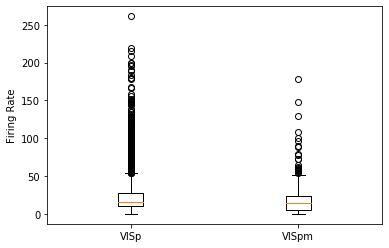

In [26]:
fig,ax = plt.subplots()
firing_rate_visp = merged_visp['firing_rate']
firing_rate_vispm = merged_vispm['firing_rate']
data = [firing_rate_visp, firing_rate_vispm]

ax.boxplot(data)
ax.set_xticklabels(['VISp','VISpm'])
ax.set_ylabel('Firing Rate')
plt.show()


## Data Analysis & Results

Include cells that describe the steps in your data analysis.

Performing PCA on the VISp dataframe.

In [27]:
visp_data = visp_features.drop('structure_parent__acronym',axis=1)
visp_data = (visp_data - visp_data.mean())/visp_data.std()
pca = PCA(n_components = 2)           
VISP_2D = pca.fit_transform(visp_data)  
visp_features['PCA1'] = VISP_2D[:, 0]
visp_features['PCA2'] = VISP_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=visp_features, fit_reg=False)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

Performing PCA on the VISpm dataframe.

In [28]:
vispm_data = vispm_features.drop('structure_parent__acronym',axis=1)
vispm_data = (vispm_data - vispm_data.mean())/vispm_data.std()
pca = PCA(n_components = 2)           
VISPM_2D = pca.fit_transform(vispm_data)  
vispm_features['PCA1'] = VISPM_2D[:, 0]
vispm_features['PCA2'] = VISPM_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=vispm_features, fit_reg=False)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

Average Firing Rate for VISp and VISpm Units

We use the Dataarray da_visp created before to plot the average firing rate for each unit in VISp as a function of time

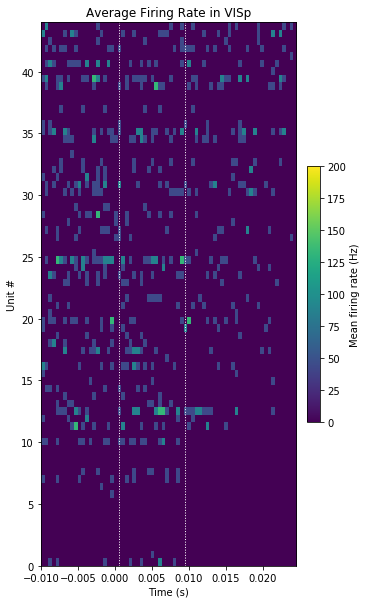

In [29]:
def plot_optotagging_response(da_visp):

    plt.figure(figsize=(5,10))

    plt.imshow(da_visp.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')
    plt.title('Average Firing Rate in VISp')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_visp)
plt.show()

We use the Dataarray da_vispm created before to plot the average firing rate for each unit in VISp as a function of time

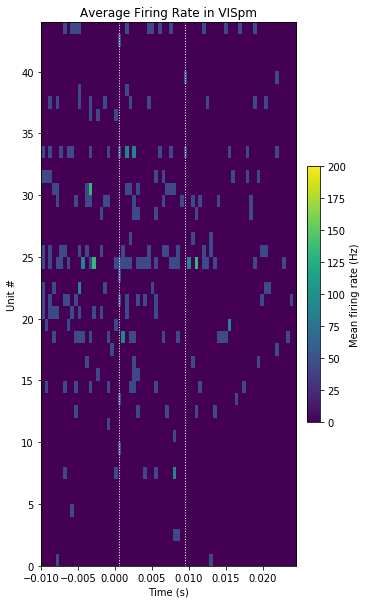

In [30]:
def plot_optotagging_response(da_vispm):

    plt.figure(figsize=(5,10))

    plt.imshow(da_vispm.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_vispm)
plt.title('Average Firing Rate in VISpm')
plt.show()

VISp and VISpm PV+ or PV- neurons

We compare the baseline and evoked rates and see a subset of units in VISp with a light-evoked increase in firing rate

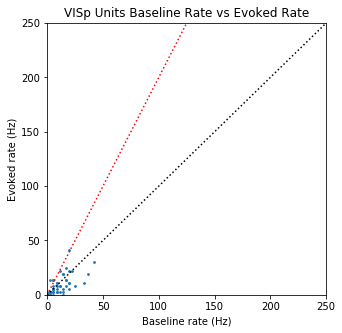

In [31]:
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate_visp, evoked_rate_visp, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')
plt.title('VISp Units Baseline Rate vs Evoked Rate')
plt.show()

We compare the baseline and evoked rates and see a subset of units in VISpm with a light-evoked increase in firing rate

Text(0.5, 1.0, 'VISpm Baseline Rate vs Evoked Rate')

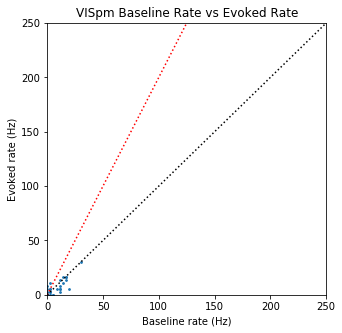

In [32]:
#We compared the baseline and evoked rates and saw a subset of units in VISpm with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate_vispm, evoked_rate_vispm, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')

plt.title('VISpm Baseline Rate vs Evoked Rate')

In [37]:
allen_plist = cell_visp['firing_rate'].tolist()
pixels_plist = df_visp_firing_rate['firing_rate'].tolist()
print(pixels_plist)
print('Allen Cell Types ViSp Firing Rate n = ' + str(len(allen_plist)))
print('Neuropixels ViSp Firing Rate n = ' + str(len(pixels_plist)))

[18.8984121946508, 3.09063006777896, 1.3573944954056, 1.23616885342927, 2.88072048703265, 2.59460301986382, 6.95061669698573, 4.94311590717364, 2.70210500425792, 4.27273602770249, 10.6920808288915, 3.70372407355461, 7.32593793843902, 18.6643822460327, 7.46910063912633, 5.14543588940857, 0.772995410029151, 3.8281726957207, 22.2100763231859, 19.0285790074762, 1.19634945302023, 5.7350333299298, 16.7296584282476, 5.74511813891068, 10.9977441114047, 8.90561409983551, 1.31144103592572, 2.60728700641709, 2.69732251752472, 7.25742361763079, 2.23404510702171, 3.63957637106799, 6.21962399652642, 1.77149546623897, 5.07848107514377, 0.846604118879271, 16.4509226253844, 0.570675427794218, 0.237252928807871, 1.69258443514117, 0.7407656081315, 2.33510113103628, 0.902226518928443, 2.23290146888986, 6.7780889331894, 6.17225643360919, 2.27426277038706, 2.04276157330999, 1.92945384775364, 8.2187602804238, 0.661966602149409, 9.8140083138071, 3.44247581607724, 1.40428813260621, 11.9902443087816, 15.7325178

In [38]:
allen_pmlist = cell_vispm['firing_rate'].tolist()
pixels_pmlist = df_vispm_firing_rate['firing_rate'].tolist()
print(pixels_pmlist)
print('Allen ViSpm Firing Rate n = ' + str(len(allen_pmlist)))
print('Neuropixels ViSpm Firing Rate n = ' + str(len(pixels_pmlist)))

[18.8984121946508, 3.09063006777896, 1.3573944954056, 1.23616885342927, 2.88072048703265, 2.59460301986382, 6.95061669698573, 4.94311590717364, 2.70210500425792, 4.27273602770249, 10.6920808288915, 3.70372407355461, 7.32593793843902, 18.6643822460327, 7.46910063912633, 5.14543588940857, 0.772995410029151, 3.8281726957207, 22.2100763231859, 19.0285790074762, 1.19634945302023, 5.7350333299298, 16.7296584282476, 5.74511813891068, 10.9977441114047, 8.90561409983551, 1.31144103592572, 2.60728700641709, 2.69732251752472, 7.25742361763079, 2.23404510702171, 3.63957637106799, 6.21962399652642, 1.77149546623897, 5.07848107514377, 0.846604118879271, 16.4509226253844, 0.570675427794218, 0.237252928807871, 1.69258443514117, 0.7407656081315, 2.33510113103628, 0.902226518928443, 2.23290146888986]
Allen ViSpm Firing Rate n = 89
Neuropixels ViSpm Firing Rate n = 44


In [67]:
visp_list = firing_rate_visp.tolist()
vispm_list = firing_rate_vispm.tolist()

In [81]:
#SKEW TEST FOR VISP
stat,pvalue = stats.skewtest(visp_list)
print(pvalue)
#SKEW TEST FOR VISPM
statpm,pvaluepm = stats.skewtest(vispm_list)
print(pvaluepm)

print('The ViSp and ViSpm datasets are not likely to be skewed.')

3.7340551189750735e-161
4.1421159126548525e-14
The ViSp and ViSpm datasets are not likely to be skewed.


In [82]:
#STUDENT'S INDEPENDENT T-TEST COMPARING VISP AND VISPM
t,p = sp.stats.ttest_ind(visp_list,vispm_list)
print('t-value = %.3f, p = %.3f' % (t, p))
print('The results are not statistically significant.')

t-value = 1.145, p = 0.252
The results are not statistically significant.


In [83]:
#ONE WAY ANOVA COMPARING VISP AND VISPM
stat,p = sp.stats.f_oneway(visp_list,vispm_list)
print('stat = %.3f, p = %.3f' % (stat, p))
print('The results are not statistically significant.')

stat = 1.312, p = 0.252
The results are not statistically significant.


In [90]:
#SKEW TEST FOR ALLEN CELL TYPES VISP
stat,pvalue = stats.skewtest(cell_visp['firing_rate'])
print('Allen Visp skew p = ' + str(pvalue))
#SKEW TEST FOR ALLEN CELL TYPES VISPM
stat,pvalue = stats.skewtest(cell_vispm['firing_rate'])
print('Allen Vispm skew p = ' + str(pvalue))
#SKEW TEST FOR NEUROPIXELS VISP
stat,pvalue = stats.skewtest(df_visp_firing_rate['firing_rate'])
print('Neuropixels Visp skew p = ' + str(pvalue))
#SKEW TEST FOR NEUROPIXELS VISPM
stat,pvalue = stats.skewtest(df_vispm_firing_rate['firing_rate'])
print('Neuropixels Vispm skew p = ' + str(pvalue))

Allen Visp skew p = 6.159214076353638e-147
Allen Vispm skew p = 1.3347391019908031e-08
Neuropixels Visp skew p = 2.6027068680404845e-07
Neuropixels Vispm skew p = 0.00035842187588469446


In [95]:
allen_visp = cell_visp['firing_rate']
np_visp = df_visp_firing_rate['firing_rate']
allen_vispm = cell_vispm['firing_rate']
np_vispm = df_vispm_firing_rate['firing_rate']

#STUDENT'S INDEPENDENT T-TEST COMPARING VISP FOR ALLEN VS NEUROPIXELS
t,p = sp.stats.ttest_ind(allen_visp,np_visp)
print('VISP Data Set T-Test: t-value = %.3f, p = %.3f' % (t, p))
#STUDENT'S INDEPENDENT T-TEST COMPARING VISPM FOR ALLEN VS NEUROPIXELS
t,p = sp.stats.ttest_ind(allen_vispm,np_vispm)
print('VISPM Data Set T-Test: t-value = %.3f, p = %.3f' % (t, p))

VISP Data Set T-Test: t-value = 7.296, p = 0.000
VISPM Data Set T-Test: t-value = 5.195, p = 0.000


In [96]:
#ONE WAY ANOVA COMPARING VISP FOR ALLEN VS NEUROPIXELS
stat,p = sp.stats.f_oneway(allen_visp,np_visp)
print('VISP Data Set ANOVA: stat = %.3f, p = %.3f' % (stat, p))
#ONE WAY ANOVA COMPARING VISPM FOR ALLEN VS NEUROPIXELS
stat,p = sp.stats.f_oneway(allen_vispm,np_vispm)
print('VISPM Data Set ANOVA: stat = %.3f, p = %.3f' % (stat, p))

VISP Data Set ANOVA: stat = 53.228, p = 0.000
VISPM Data Set ANOVA: stat = 26.991, p = 0.000


## Conclusion & Discussion

*Fill in your discussion information here*